## First present analytic-numeric FL solution of antenna response
- $A_\parallel=0$ for simplicity

In [2]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from gk_solver.gk_apar0 import (upar_res_i, 
                                upar_res_0, 
                                eigenmode_finder)
from gk_solver.util import real_imag, list2complex
# import seaborn as sns
%matplotlib inline

Helper function to create time series for analytic FL solution

In [3]:
def upar_ts_constructor(ti_te, mi_me, bi, kperp_rhoi, 
                   wbar_0, wbar_arr, tbar_arr, turnoff=None):
    """
    return time series for B_parallel and phi
    """
    
    def phi_b(tbar):
        """
            vector(\phi(t), B(t))
    """
        res = upar_res_0(ti_te, mi_me, bi, kperp_rhoi, wbar_0, tbar, turnoff=turnoff)
        for wbar_i in wbar_arr:
            res += upar_res_i(ti_te, mi_me, bi, kperp_rhoi, wbar_0, wbar_i, tbar, turnoff=turnoff)
        return res
    
    phi_b_arr = np.array([phi_b(tbar) for tbar in tbar_arr])
    return phi_b_arr

Parameters

In [4]:
ti_te = 1.
kperp_rhoi = 0.2
wbar0_arr = (0.05, 0.1, 0.12,0.135, 0.14, 0.15, 0.5)
bi = 0.01
upar0 = 10
mi_me = 1836

texts = "{0}{1}\n".format(r'$\beta_i$=',bi) + \
    "{0}{1}\n".format(r'$T_i/T_e=$',ti_te) + \
    "{0}{1}\n".format(r'$k_\perp \rho_i=$',kperp_rhoi) + \
    "{0}{1}\n".format(r'$\overline{u}_0=$', upar0)
#     +\
#     "{0}{1:.2f}\n".format(r'$\overline{\omega}_0=$', wbar_0)

Eigenmode of the system

In [5]:
wbar_arr = eigenmode_finder(ti_te, mi_me, bi, kperp_rhoi)
print("{0:.3g}\n {1:.3g}\n {2:.3g}\n".format(*wbar_arr))

0.144-0.0644j
 -0.144-0.0644j
 -0-0.185j



Contruct $|B_\parallel|$ and $|\phi|$

In [6]:
tbar_arr = np.linspace(0, 200, 500)
phi_arr = {}
bpar_arr = {}
for i, wbar_0 in enumerate(wbar0_arr):
    phi_bpar_arr = upar_ts_constructor(ti_te, mi_me, bi, kperp_rhoi, 
                              wbar_0, wbar_arr, tbar_arr)
    phi_arr[i] = np.abs(phi_bpar_arr[:, 0])
    bpar_arr[i] = np.abs(phi_bpar_arr[:,1])

Adjust default plot setting

In [7]:
import matplotlib as mpl
fs = 16
mpl.rcParams['font.size'] = fs
mpl.rcParams['axes.labelsize'] = fs
mpl.rcParams['axes.titlesize'] = fs
mpl.rcParams['xtick.labelsize'] = fs
mpl.rcParams['ytick.labelsize'] = fs
mpl.rcParams['legend.fontsize'] = fs-2

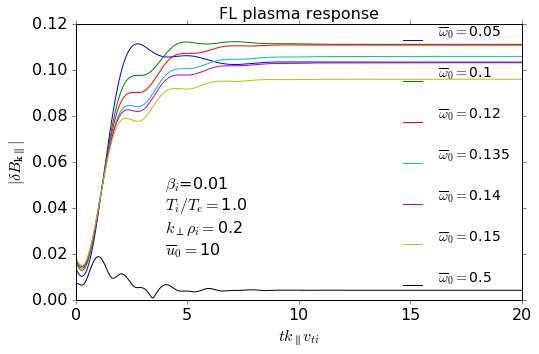

In [8]:
fig_bpar_w0, ax = plt.subplots(figsize=[8, 8*0.618])
for i, wbar_0 in enumerate(wbar0_arr):
    ax.plot(tbar_arr * np.sqrt(bi), bpar_arr[i] * upar0, 
             label = "{0}{1:.3g}\n".format(r'$\overline{\omega}_0=$', wbar_0))
ax.legend(loc='center right', frameon=False)
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_ylabel('$|\delta B_{\mathbf{k}\parallel}|$')
ax.set_title('FL plasma response')
plt.text(0.2, 0.1, texts, transform=ax.transAxes)
plt.show()

In [10]:
# fig_bpar_w0.savefig('FL_bpar_t_w0_1.png', dpi = 200)

For comparison, we plot runs from AstroGK with $A_\parallel=0$
<img src="figures/Ebpar_t_w0_1.png", width="600">

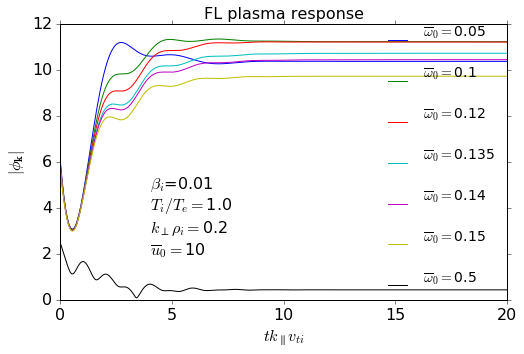

In [11]:
fig_phi_w0, ax = plt.subplots(figsize=[8, 8*0.618])
for i, wbar_0 in enumerate(wbar0_arr):
    ax.plot(tbar_arr * np.sqrt(bi), phi_arr[i] * upar0, 
             label = "{0}{1:.3g}\n".format(r'$\overline{\omega}_0=$', wbar_0))
ax.legend(loc='center right', frameon=False)
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_ylabel('$|\phi_{\mathbf{k}}|$')
ax.set_title('FL plasma response')
plt.text(0.2, 0.1, texts, transform=ax.transAxes)
plt.show()

In [13]:
# fig_phi_w0.savefig('FL_bphi_t_w0_1.png', dpi = 200)

Again AstroGK simulation with $A_\parallel = 0$
<img src="figures/Ephi_t_w0_1.png", width="600">

## Then we characterize the antenna efficiency
- We relax constraint on $A_\parallel$

In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fs = 16
mpl.rcParams['font.size'] = fs
mpl.rcParams['axes.labelsize'] = fs
mpl.rcParams['axes.titlesize'] = fs
mpl.rcParams['xtick.labelsize'] = fs
mpl.rcParams['ytick.labelsize'] = fs
mpl.rcParams['legend.fontsize'] = fs-2

In [72]:
freq = [0.002, 0.01, 0.05, 0.1, 0.12, 0.13, 0.135, 0.14, 0.15, 0.5, 0.9, 1.1, 5]
mva = [6.4e-6, 1.36e-4, 0.0039, 0.015, 0.0205, 0.0248, 0.0265, 0.0277, 0.0303, 0.0463, 64.8, 9860, 890]

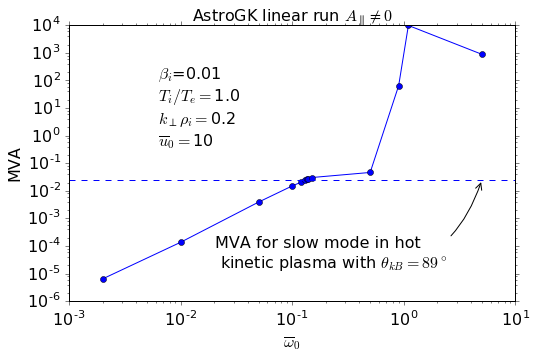

In [75]:
ti_te = 1.
kperp_rhoi = 0.2
wbar0_arr = (0.05, 0.1, 0.12,0.135, 0.14, 0.15, 0.5)
bi = 0.01
upar0 = 10
mi_me = 1836

texts = "{0}{1}\n".format(r'$\beta_i$=',bi) + \
    "{0}{1}\n".format(r'$T_i/T_e=$',ti_te) + \
    "{0}{1}\n".format(r'$k_\perp \rho_i=$',kperp_rhoi) + \
    "{0}{1}\n".format(r'$\overline{u}_0=$', upar0)

fig_mva_w0_1, ax = plt.subplots(figsize=[8, 8*0.618])
ax.plot(freq, mva, 'o-')
ax.set_xlabel('$\overline{\omega}_0$')
ax.set_ylabel('MVA')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('AstroGK linear run ' + r'$A_\parallel \neq 0$')
ax.axhline(0.0242, linestyle='dashed')
plt.text(0.2, 0.5, texts, transform=ax.transAxes)
at_text = 'MVA for slow mode in hot \n kinetic plasma ' + r'with $\theta_{kB}=89^\circ$'
plt.annotate(at_text, xy=(5, 0.0242), xycoords='data',
            xytext=(0.4, 0.25),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5"))
plt.show()
# fig_mva_w0_1.savefig('AGK_mva_w0_1.png', dpi=200)

In [57]:
kperp = 0.2
kpar = 1e-4**(1/3) * kperp**(2/3)
np.rad2deg(np.arctan(kperp/kpar))

85.461944330507421

slow mode

In [76]:
freq = [0.1, 0.5, 0.9, 0.95, 1.0, 1.1, 2]
mva = [2.4e5, 6810, 2141, 1922, 1736, 1435, 436.7]

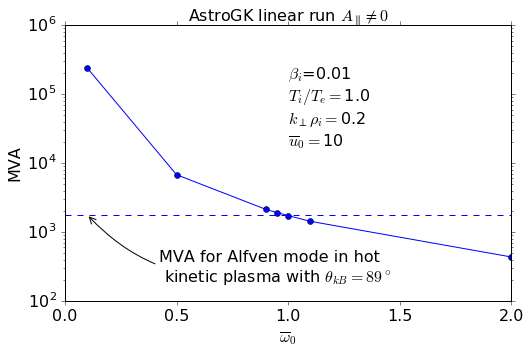

In [78]:
ti_te = 1.
kperp_rhoi = 0.2
wbar0_arr = (0.05, 0.1, 0.12,0.135, 0.14, 0.15, 0.5)
bi = 0.01
upar0 = 10
mi_me = 1836

texts = "{0}{1}\n".format(r'$\beta_i$=',bi) + \
    "{0}{1}\n".format(r'$T_i/T_e=$',ti_te) + \
    "{0}{1}\n".format(r'$k_\perp \rho_i=$',kperp_rhoi) + \
    "{0}{1}\n".format(r'$\overline{u}_0=$', upar0)

fig_mva_w0_1, ax = plt.subplots(figsize=[8, 8*0.618])
ax.plot(freq, mva, 'o-')
ax.set_xlabel('$\overline{\omega}_0$')
ax.set_ylabel('MVA')
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_title('AstroGK linear run ' + r'$A_\parallel \neq 0$')
ax.axhline(1782, linestyle='dashed')
plt.text(0.5, 0.5, texts, transform=ax.transAxes)
at_text = 'MVA for Alfven mode in hot \n kinetic plasma ' + r'with $\theta_{kB}=89^\circ$'
plt.annotate(at_text, xy=(0.1, 1782), xycoords='data',
            xytext=(0.3, 0.2),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.3"))

plt.show()
# fig_mva_w0_1.savefig('AGK_mva_w0_2.png', dpi=200)

In [79]:
np.sqrt(13.6/1.976e-2)

26.23469285720229